In [57]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [58]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

---
### 1. Постройте парные регрессии от каждого атрибута с целевой переменной.


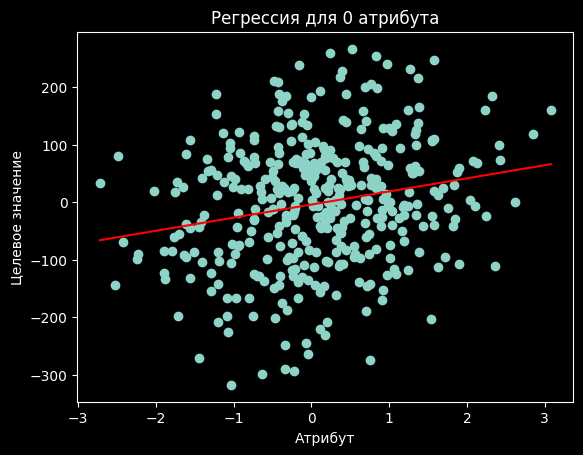

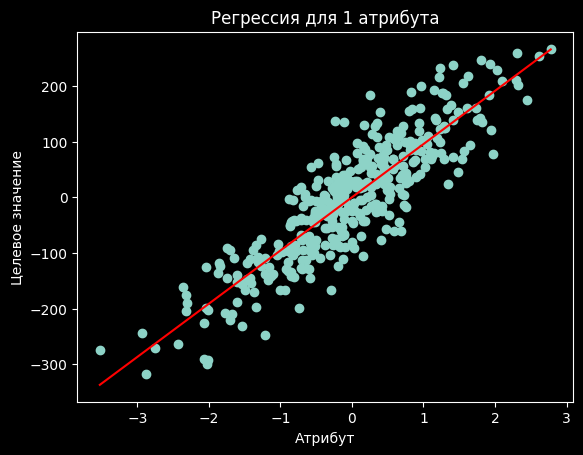

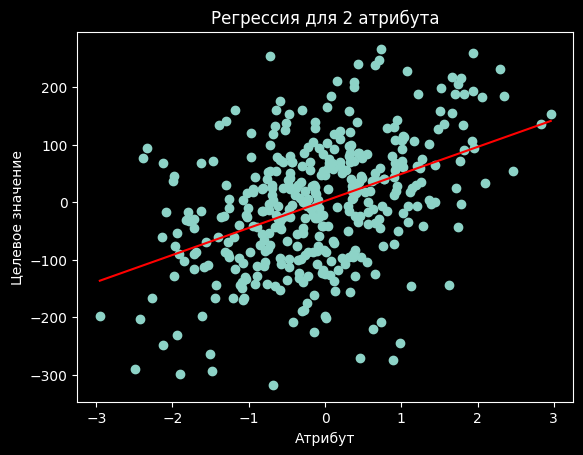

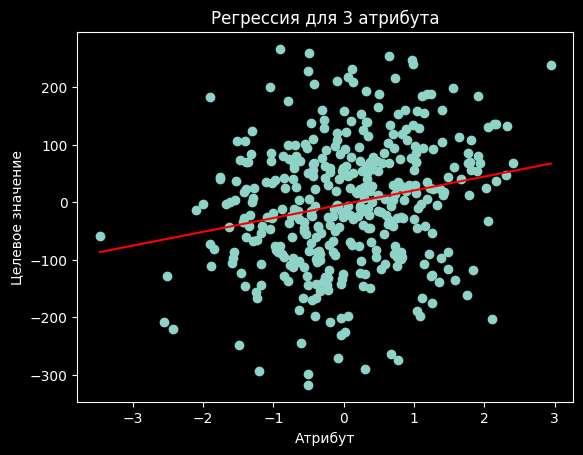

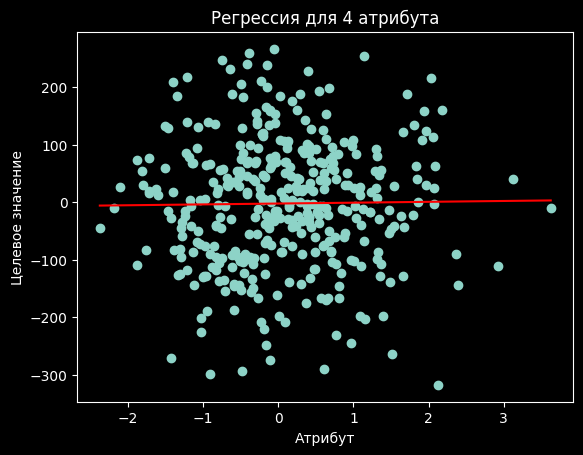

In [79]:
binary = LinearRegression()
results = []

dets0 = []
for attribute in x.columns:
    binary.fit(x[[attribute]], y)
    binary.predict(x[[attribute]])

    plt.scatter(x[attribute], y)
    X = np.linspace(x[attribute].min(), x[attribute].max(), 100).reshape((-1, 1))
    plt.plot(X, binary.predict(X), c="r")
    # print(binary.predict(x[attribute]))
    dets0.append(r2_score(y.values, binary.predict(x[[attribute]])))
    plt.title(f"Регрессия для {attribute} атрибута")
    plt.xlabel("Атрибут")
    plt.ylabel("Целевое значение")

    plt.show()


---
### 2. Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.


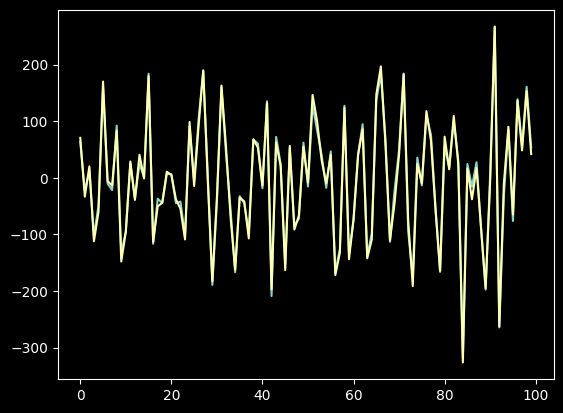

In [81]:
# Множественная регрессия
multi = LinearRegression()
multi.fit(x, y)
k = 100
Y = multi.predict(x).ravel()
dets1 = r2_score(y, Y)
plt.plot(y[:k])
plt.plot(Y[:k])


---
### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.


In [82]:
model = LinearRegression()
res = []
dets2 = []
for attribute in x.columns:
    degrees = [2, 3, 10]
    for power in degrees:
        poly = PolynomialFeatures(degree=power)
        X_poly = poly.fit_transform(x[[attribute]])
        start_time = time.time()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        dets2.append(r2)
        res.append([attribute, power, mse, r2])
pd.DataFrame(
    res,
    columns=[
        "Столбец",
        "Степень",
        "Средняя квадратическая ошибка",
        "R²",
    ],
)

,Столбец,Степень,Средняя квадратическая ошибка,R²
0,0,2,11491.909255,0.043672
1,0,3,11490.787323,0.043765
2,0,10,11411.586520,0.050356
3,1,2,2763.909753,0.769994
4,1,3,2750.401156,0.771118
5,1,10,2731.672893,0.772677
6,2,2,9733.431563,0.190008
7,2,3,9699.859735,0.192802
8,2,10,9560.372197,0.204409
9,3,2,11440.588266,0.047943



---
### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.


In [87]:
# Точность моделей одиночной линейной регрессии
dets0

[0.04364336234689348,
 0.7699743283650629,
 0.18794528514998887,
 0.047470345664983093,
 0.00017176151145947838]

In [89]:
# Точность модели множественной регрессии
# Самая точная модель
dets1

0.9922198026415868

In [90]:
# Точность полиномиальных моделей
dets2

[0.04367170367915507,
 0.04376506816920167,
 0.05035596325168745,
 0.7699942588883133,
 0.7711184109235001,
 0.7726769307411921,
 0.19000787278473819,
 0.19280163734543854,
 0.20440944561264418,
 0.04794250960519941,
 0.05031163217811918,
 0.07266746559268988,
 0.0010490365524417067,
 0.0010646025332345932,
 0.0450526417134679]


---
### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.